# Business Understanding

Preparing meals is often a challenge due to individual preferences, dietary needs, and ingredient availability. This project aims to develop a Personalized Recipe Recommendation System that uses machine learning and NLP to suggest relevant recipes tailored to each user. The system is designed to enhance convenience, promote healthier eating habits, and reduce food waste. It has potential applications in health tech, food delivery platforms, and smart kitchen systems.


# Problem Statement
To develop a Personalized Recipe Recommendation System that leverages machine learning and NLP

#Objectives

1.   To develop a content-based model using NLP to recommend recipes based on ingredients and instructions.
2.   To build a collaborative filtering model using user ratings and interactions.
3.   To combine both approaches into a hybrid recommendation system.
4.   To evaluate model performance

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install isodate


In [3]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from isodate import parse_duration
import warnings
warnings.filterwarnings("ignore")

In [4]:
file_path = "recipes.parquet"

df_recipes = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "irkaal/foodcom-recipes-and-reviews",
    file_path,
)


In [5]:
file_path2 = "reviews.parquet"

df_reviews = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "irkaal/foodcom-recipes-and-reviews",
    file_path2,
)


# Data Understanding


In [6]:
print("Recipes:", df_recipes.shape)
print("Reviews:", df_reviews.shape)

Recipes: (522517, 28)
Reviews: (1401982, 8)


In [7]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   RecipeId                    522517 non-null  float64            
 1   Name                        522517 non-null  object             
 2   AuthorId                    522517 non-null  int32              
 3   AuthorName                  522517 non-null  object             
 4   CookTime                    439972 non-null  object             
 5   PrepTime                    522517 non-null  object             
 6   TotalTime                   522517 non-null  object             
 7   DatePublished               522517 non-null  datetime64[us, UTC]
 8   Description                 522512 non-null  object             
 9   Images                      522516 non-null  object             
 10  RecipeCategory              521766 non-null 

In [8]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   ReviewId       1401982 non-null  int32              
 1   RecipeId       1401982 non-null  int32              
 2   AuthorId       1401982 non-null  int32              
 3   AuthorName     1401982 non-null  object             
 4   Rating         1401982 non-null  int32              
 5   Review         1401982 non-null  object             
 6   DateSubmitted  1401982 non-null  datetime64[us, UTC]
 7   DateModified   1401982 non-null  datetime64[us, UTC]
dtypes: datetime64[us, UTC](2), int32(4), object(2)
memory usage: 64.2+ MB


In [9]:
df_recipes.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,None,"[Toss 2 cups berries with sugar., Let stand fo..."
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00+00:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,None,[Soak saffron in warm milk for 5 minutes and p...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00+00:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,None,"[Into a 1 quart Jar with tight fitting lid, pu..."
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00+00:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"[Drain the tofu, carefully squeezing out exces..."
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,None,"[Mix everything together and bring to a boil.,..."


In [10]:
df_reviews.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17 16:49:59+00:00,2001-10-17 16:49:59+00:00
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25 09:00:00+00:00,2000-02-25 09:00:00+00:00
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00,2000-03-13 21:15:00+00:00
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28 12:51:00+00:00,2000-03-28 12:51:00+00:00


In [11]:
df_recipes.isnull().sum()

,0
RecipeId,0
Name,0
AuthorId,0
AuthorName,0
CookTime,82545
PrepTime,0
TotalTime,0
DatePublished,0
Description,5
Images,1


In [12]:
df_reviews.isnull().sum()

,0
ReviewId,0
RecipeId,0
AuthorId,0
AuthorName,0
Rating,0
Review,0
DateSubmitted,0
DateModified,0


# Data Cleaning

In [13]:
#Handling Missing Values
df_recipes['AggregatedRating'] = df_recipes['AggregatedRating'].fillna(0)
df_recipes['ReviewCount'] = df_recipes['ReviewCount'].fillna(0)
df_recipes['RecipeServings'] = df_recipes['RecipeServings'].fillna(df_recipes['RecipeServings'].median())
df_recipes['RecipeCategory'] = df_recipes['RecipeCategory'].fillna("Unknown").str.lower().str.strip()

df_reviews.dropna(subset=['Review'], inplace=True)

In [14]:
# Converting the time to minutes
def safe_parse_minutes(x):
    if pd.isnull(x) or not isinstance(x, str) or not x.startswith('P'):
        return 0
    try:
        return parse_duration(x).total_seconds() / 60
    except:
        return 0

df_recipes['CookTimeMinutes'] = df_recipes['CookTime'].apply(safe_parse_minutes)
df_recipes['PrepTimeMinutes'] = df_recipes['PrepTime'].apply(safe_parse_minutes)
df_recipes['TotalTimeMinutes'] = df_recipes['TotalTime'].apply(safe_parse_minutes)

In [15]:
# Filling missing time with 0
df_recipes[['CookTimeMinutes', 'PrepTimeMinutes', 'TotalTimeMinutes']] = df_recipes[
    ['CookTimeMinutes', 'PrepTimeMinutes', 'TotalTimeMinutes']
].fillna(0)

In [16]:
# Drop rows where total time is less than 0
df_recipes = df_recipes[df_recipes['TotalTimeMinutes'] > 0]


In [17]:
# Convert numpy arrays to regular lists
df_recipes['Ingredients'] = df_recipes['RecipeIngredientParts'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
df_recipes['Quantities'] = df_recipes['RecipeIngredientQuantities'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

In [18]:
#Convert Text to Lowercase & Clean
for text_col in ['Name', 'Description', 'RecipeInstructions','Keywords']:
    df_recipes[text_col] = df_recipes[text_col].astype(str).str.lower().str.replace(r'[^a-z\s]', '', regex=True)


In [19]:
#Tokenize Keywords into List Format
df_recipes['KeywordList'] = df_recipes['Keywords'].apply(lambda x: x.split())

In [20]:
df_reviews['Rating'] = df_reviews['Rating'].astype(float)

In [21]:
# Drop duplicate recipes and reviews
df_recipes.drop_duplicates(subset=['RecipeId'], inplace=True)
df_reviews.drop_duplicates(subset=['ReviewId'], inplace=True)


In [22]:
#Drop Recipes with Few reviews
MIN_REVIEWS = 5
popular_recipes = df_reviews['RecipeId'].value_counts()
popular_recipes = popular_recipes[popular_recipes >= MIN_REVIEWS].index
df_recipes = df_recipes[df_recipes['RecipeId'].isin(popular_recipes)]
df_reviews = df_reviews[df_reviews['RecipeId'].isin(popular_recipes)]


In [23]:
# Drop unnecesary cols
drop_cols = ['AuthorName', 'TotalTime', 'PrepTime','CookTime','RecipeIngredientParts','RecipeIngredientQuantities','RecipeYield','Keywords']
df_recipes.drop(columns=drop_cols, inplace=True, errors='ignore')

drop_cols2 = ['AuthorName']
df_reviews.drop(columns=drop_cols2, inplace=True, errors='ignore')

In [24]:
recipes_clean=df_recipes
reviews_clean=df_reviews

In [25]:
missing_recipe_ids = reviews_clean[~reviews_clean['RecipeId'].isin(recipes_clean['RecipeId'])]
print(f"Number of reviews with RecipeId not in recipes: {len(missing_recipe_ids)}")


Number of reviews with RecipeId not in recipes: 4079


In [26]:
missing_author_ids = reviews_clean[~reviews_clean['AuthorId'].isin(recipes_clean['AuthorId'])]
print(f"Number of reviews with AuthorId not in recipes: {len(missing_author_ids)}")


Number of reviews with AuthorId not in recipes: 532306


In [27]:
# Create a set of valid (RecipeId, AuthorId) pairs from the recipes dataset
valid_pairs = set(zip(recipes_clean['RecipeId'], recipes_clean['AuthorId']))

# Check which rows in reviews don't have a matching pair
invalid_pairs = reviews_clean[~reviews_clean.apply(lambda row: (row['RecipeId'], row['AuthorId']) in valid_pairs, axis=1)]

print(f"Number of reviews with unmatched RecipeId & AuthorId pairs: {len(invalid_pairs)}")


Number of reviews with unmatched RecipeId & AuthorId pairs: 1028061


In [28]:
# Keep only reviews with RecipeIds that exist in recipes
valid_reviews = reviews_clean[reviews_clean['RecipeId'].isin(recipes_clean['RecipeId'])].copy()

print(f"Remaining reviews after filtering: {len(valid_reviews)}")


Remaining reviews after filtering: 1024428


In [29]:
# Merge on RecipeId
merged_df = pd.merge(
    valid_reviews,
    recipes_clean,
    on='RecipeId',
    how='inner',
    suffixes=('_review', '_recipe')
)

print(f"Merged dataset shape: {merged_df.shape}")
print(merged_df[['RecipeId', 'AuthorId_review', 'AuthorId_recipe']].head())


Merged dataset shape: (1024428, 32)
   RecipeId  AuthorId_review  AuthorId_recipe
0       992             2008             1545
1      4523             2046             1932
2      7435             1773             1986
3        44             2085             1596
4     13307             2046            20914


In [30]:
# drop AuthorId_review - we are more interested in the authors of the recipes
drop_cols3 = ['AuthorId_review']
merged_df.drop(columns=drop_cols3, inplace=True, errors='ignore')

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024428 entries, 0 to 1024427
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype              
---  ------               --------------    -----              
 0   ReviewId             1024428 non-null  int32              
 1   RecipeId             1024428 non-null  int32              
 2   Rating               1024428 non-null  float64            
 3   Review               1024428 non-null  object             
 4   DateSubmitted        1024428 non-null  datetime64[us, UTC]
 5   DateModified         1024428 non-null  datetime64[us, UTC]
 6   Name                 1024428 non-null  object             
 7   AuthorId_recipe      1024428 non-null  int32              
 8   DatePublished        1024428 non-null  datetime64[us, UTC]
 9   Description          1024428 non-null  object             
 10  Images               1024428 non-null  object             
 11  RecipeCategory       1024428 non-null  object     

In [32]:
from sklearn.preprocessing import LabelEncoder

recipe_encoder = LabelEncoder()
author_encoder = LabelEncoder()

merged_df['RecipeId_encoded'] = recipe_encoder.fit_transform(merged_df['RecipeId'])


In [33]:
#Normalize Nutritional Features
from sklearn.preprocessing import MinMaxScaler

nutritional_cols = [
    'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
    'SugarContent', 'ProteinContent'
]

scaler = MinMaxScaler()
merged_df[nutritional_cols] = scaler.fit_transform(merged_df[nutritional_cols])


##Feature Engineering
We are going to categorize recipes that share a theme into recipe categories

In [34]:
#print unique name and unique RecipeCategory

unique_categories = merged_df['RecipeCategory'].unique()

print("\nUnique Recipe Categories:")
print(unique_categories)





Unique Recipe Categories:
['vegetable' 'chicken breast' 'meat' 'chicken' 'dessert' 'lamb/sheep'
 'steak' 'pork' 'pie' 'tuna' 'sauces' 'quick breads' 'drop cookies'
 'lunch/snacks' 'winter' 'breads' 'whole chicken' 'bar cookie'
 'high protein' 'candy' 'beans' 'cheesecake' 'meatloaf' 'corn' 'stew'
 'potato' 'german' 'breakfast' 'white rice' '< 60 mins' 'cheese' 'crab'
 'punch beverage' 'cauliflower' 'european' 'ham' 'onions' 'clear soup'
 'beverages' 'lentil' 'low protein' 'savory pies' 'chowders' 'pineapple'
 'free of...' 'yeast breads' '< 15 mins' 'spaghetti' 'poultry' 'spreads'
 'gelatin' 'berries' 'one dish meal' 'fruit' 'mussels' 'frozen desserts'
 'roast beef' 'smoothies' 'long grain rice' 'salad dressings' 'oven'
 'weeknight' 'rice' 'manicotti' 'shakes' 'low cholesterol' 'scones'
 'halibut' 'greens' 'veal' 'potluck' 'vegan' 'very low carbs' 'plums'
 'tex mex' 'collard greens' 'brown rice' 'cajun' 'black beans' 'jellies'
 '< 30 mins' 'mahi mahi' 'penne' 'apple' 'lactose free'
 'so

In [35]:
# Define the category mapping (as shown above)
category_mapping = {
    'chicken': ['chicken', 'chicken breast', 'chicken thigh & leg', 'whole chicken', 'chicken livers'],
    'beef': ['steak', 'roast beef', 'beef organ meats', 'wild game', 'goose', 'meatballs', 'elk', 'moose', 'bear'],
    'pork': ['pork', 'ham', 'sausage', 'bacon'],
    'lamb': ['lamb/sheep'],
    'fish': ['tuna', 'halibut', 'tilapia', 'trout', 'bass', 'perch', 'salmon', 'catfish', 'mussels', 'squid', 'octopus', 'crab', 'lobster', 'shrimp', 'seafood'],
    'vegetarian': ['vegetable', 'vegan', 'tofu', 'lentil', 'beans', 'cauliflower', 'greens', 'spinach', 'broccoli', 'eggplant', 'zucchini', 'tomato', 'carrot', 'cucumber'],
    'desserts': ['dessert', 'candy', 'cheesecake', 'gelatin', 'frozen desserts', 'scones', 'cookies', 'chocolate', 'pie', 'cake', 'tarts', 'brownies', 'puddings'],
    'baked goods': ['bread', 'breads', 'quick breads', 'yeast breads', 'sourdough breads', 'rolls', 'buns', 'muffins', 'baking', 'pancakes'],
    'pasta': ['spaghetti', 'macaroni and cheese', 'penne', 'manicotti', 'pasta shells', 'lasagna'],
    'rice': ['white rice', 'brown rice', 'short grain rice', 'long grain rice', 'wild rice', 'rice', 'paella'],
    'potatoes': ['potato', 'mashed potatoes', 'sweet potato', 'yam/sweet potato'],
    'salads': ['salad', 'salad dressings', 'coleslaw', 'potato salad', 'fruit salad', 'pasta salad'],
    'soups': ['soup', 'clear soup', 'chowders', 'gumbo', 'stew', 'lentil soup', 'chicken soup'],
    'grains': ['grains', 'quinoa', 'oats', 'barley', 'couscous', 'farro', 'bulgur', 'rice'],
    'meatloaf': ['meatloaf'],
    'sauces': ['sauces', 'gravy', 'chutneys', 'barbecue sauce', 'pasta sauce'],
    'sides': ['corn', 'side dish', 'potluck', 'side salad'],
    'drinks': ['beverages', 'smoothies', 'punch beverage', 'shakes', 'milkshakes', 'smoothie bowls', 'coffee', 'tea'],
    'breakfast': ['breakfast', 'brunch', 'oatmeal', 'pancakes', 'eggs', 'waffles', 'crepes', 'granola', 'bagels'],
    'high protein': ['high protein', 'protein shakes', 'protein bars'],
    'low protein': ['low protein'],
    'healthy': ['healthy', 'low fat', 'low carb', 'low sugar', 'low cholesterol', 'heart healthy'],
    'low carb': ['very low carbs', 'low carb'],
    'low cholesterol': ['low cholesterol'],
    'high fiber': ['high fiber'],
    'gluten free': ['gluten free'],
    'dairy free': ['dairy free foods', 'lactose free'],
    'sugar free': ['sugar free', 'low sugar'],
    'holiday': ['thanksgiving', 'christmas', "st. patrick's day", 'halloween', 'easter'],
    'international': ['mexican', 'italian', 'chinese', 'indian', 'japanese', 'greek', 'thai', 'spanish', 'french', 'portuguese', 'moroccan', 'swedish', 'turkish', 'african', 'cuban', 'polynesian', 'caribbean', 'brazilian', 'german', 'lebanese', 'chilean', 'nepalese', 'ethiopian', 'venezuelan', 'neapolitan', 'cantonese', 'pakistani', 'vietnamese', 'southwestern u.s.', 'korean', 'south african', 'australian', 'chinese', 'palestinian', 'belgian', 'russian', 'hungarian', 'swiss', 'finnish', 'norwegian', 'danish'],
    'mexican': ['mexican', 'tex mex', 'southwestern u.s.'],
    'italian': ['italian', 'sicilian', 'neapolitan'],
    'asian': ['asian', 'chinese', 'japanese', 'korean', 'vietnamese', 'thai'],
    'american': ['american', 'southern', 'new england', 'midwestern', 'californian'],
    'bbq': ['bbq', 'barbecue', 'grilled', 'broil/grill'],
    'cajun': ['cajun', 'creole', 'gumbo'],
    'seafood': ['fish', 'seafood', 'shrimp', 'lobster', 'mussels'],
    'vegan': ['vegan'],
    'low fat': ['low fat'],
    'poultry': ['poultry', 'duck', 'turkey', 'chicken', 'whole turkey', 'duck breasts', 'turkey breasts'],
    'holiday': ['christmas', 'thanksgiving', 'halloween', "st. patrick's day"],
    'fruit': ['fruit', 'berries', 'apples', 'bananas', 'pears', 'pineapple', 'grapes', 'mango', 'peaches', 'strawberries', 'raspberries', 'plums', 'oranges', 'lemons', 'cherries', 'citrus'],
    'potluck': ['potluck', 'party', 'for large groups'],
    'sweets': ['sweets', 'candies', 'chocolates', 'cookies', 'brownies', 'cakes'],
    'comfort food': ['comfort food', 'mac and cheese', 'meatloaf', 'mashed potatoes'],
    'quick meals': ['quick meals', 'quick', '< 30 mins', '< 15 mins', '< 60 mins'],
    'free of allergens': ['free of...', 'egg free', 'dairy free', 'gluten free', 'lactose free', 'peanut free'],
    'canned': ['canning', 'preserving'],
    'meals in a dish': ['one dish meal'],
    'low calorie': ['low calorie', 'low fat', 'low carb'],
    'sweets and snacks': ['sweets', 'candies', 'cookies', 'chips', 'snacks'],
    'easy': ['easy', 'beginner cook', 'beginner'],
    'other': ['unknown', 'bath/beauty', 'household cleaner', 'microwave', 'mixer', 'pressure cooker', 'slow cooker', 'stove top', 'camping', 'bread machine', 'small appliance', 'holiday'],
}

# Flatten the category mapping into a lookup dictionary
lookup = {kw.lower(): group for group, keywords in category_mapping.items() for kw in keywords}

# Function to map a single category to a broader group
def map_category(category):
    if pd.isna(category):
        return 'others'  # Handling missing values
    category = category.lower()  # Convert category to lowercase
    for keyword, group in lookup.items():
        if keyword in category:  # Check if keyword is part of category
            return group  # Return the corresponding group if found
    return 'others'  # Default category if no match found

# Apply the map_category function to the RecipeCategory column and add it as a new column
merged_df['MappedCategory'] = merged_df['RecipeCategory'].apply(map_category)

# Preview the new column to make sure it's working
#print(merged_df[['RecipeCategory', 'MappedCategory']].head())
merged_df.head()


,ReviewId,RecipeId,Rating,Review,DateSubmitted,DateModified,Name,AuthorId_recipe,DatePublished,Description,...,RecipeServings,RecipeInstructions,CookTimeMinutes,PrepTimeMinutes,TotalTimeMinutes,Ingredients,Quantities,KeywordList,RecipeId_encoded,MappedCategory
0,2,992,5.0,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00,jalapeno pepper poppers,1545,1999-09-06 04:28:00+00:00,make and share this jalapeno pepper poppers re...,...,24.0,in a mixing bowl combine cheeses bacon and sea...,0.0,30.0,30.0,"[cream cheese, sharp cheddar cheese, monterey ...","[8, 4, 4, 6, 1⁄4, 1⁄4, 1⁄4, 1, 1⁄2, None]","[mins, for, large, groups]",203,vegetarian
1,9,4523,2.0,i think i did something wrong because i could ...,2000-02-25 09:00:00+00:00,2000-02-25 09:00:00+00:00,chinese imperial palace general tsos chicken,1932,1999-11-15 05:00:00+00:00,make and share this chinese imperial palace ge...,...,8.0,combine all ingredients for sauce in a quart j...,30.0,30.0,60.0,"[cornstarch, water, fresh garlic, fresh ginger...","[1⁄2, 1⁄4, 1 1⁄2, 1 1⁄2, 3⁄4, 1⁄2, 1⁄4, 1⁄4, 1...","[chicken, poultry, meat, chinese, asian, healt...",598,poultry
2,13,7435,5.0,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00,2000-03-13 21:15:00+00:00,kevins best corned beef,1986,2000-03-11 15:27:00+00:00,make and share this kevins best corned beef re...,...,12.0,use a to qt pan\n coarsely chop enough onion...,200.0,75.0,275.0,"[onions, carrots, corned beef brisket, malt vi...","[1 3⁄4, 2 1⁄2, 6, 1, 6, 1, 1, 1⁄2, 1⁄2, 1⁄2, 2...","[european, winter, weeknight, st, patricks, day]",876,others
3,14,44,5.0,An excellent dish.,2000-03-28 12:51:00+00:00,2000-03-28 12:51:00+00:00,warm chicken a la king,1596,1999-09-17 04:47:00+00:00,i copied this one out of a friends book so man...,...,2.0,melt ozs butter add the flour and cook for ...,3.0,35.0,38.0,"[chicken, butter, flour, milk, celery, button ...","[12, 2, 3, 450, 1, 2, 1⁄4, 1, None, None, 2, 2...","[poultry, meat, mins]",2,poultry
4,19,13307,5.0,"chewy goodness, not crispy at all. i even thre...",2000-05-21 16:59:00+00:00,2000-05-21 16:59:00+00:00,neimanmarcus chocolate chip cookies recipe,20914,2001-10-27 13:54:00+00:00,make and share this neimanmarcus chocolate ch...,...,6.0,measure oatmeal and blend in a blender to a fi...,6.0,30.0,36.0,"[butter, flour, baking soda, sugar, blended oa...","[2, 4, 2, 2, 5, 24, 2, 1, 1, 4, 2, 2, 3]","[lunchsnacks, cookie, brownie, kid, friendly, ...",2620,desserts


#EDA
We will do visualizations across themes to get understanding of how the data looks.

##Visualizations for User Review Analysis
We create a histogram showing the total count of reviews under each rating. i.e. How many people rated a recipe 1-5.

The visualization indicates that most recipes were rated a solid 5 which gives confidence in the quality of the recipes.

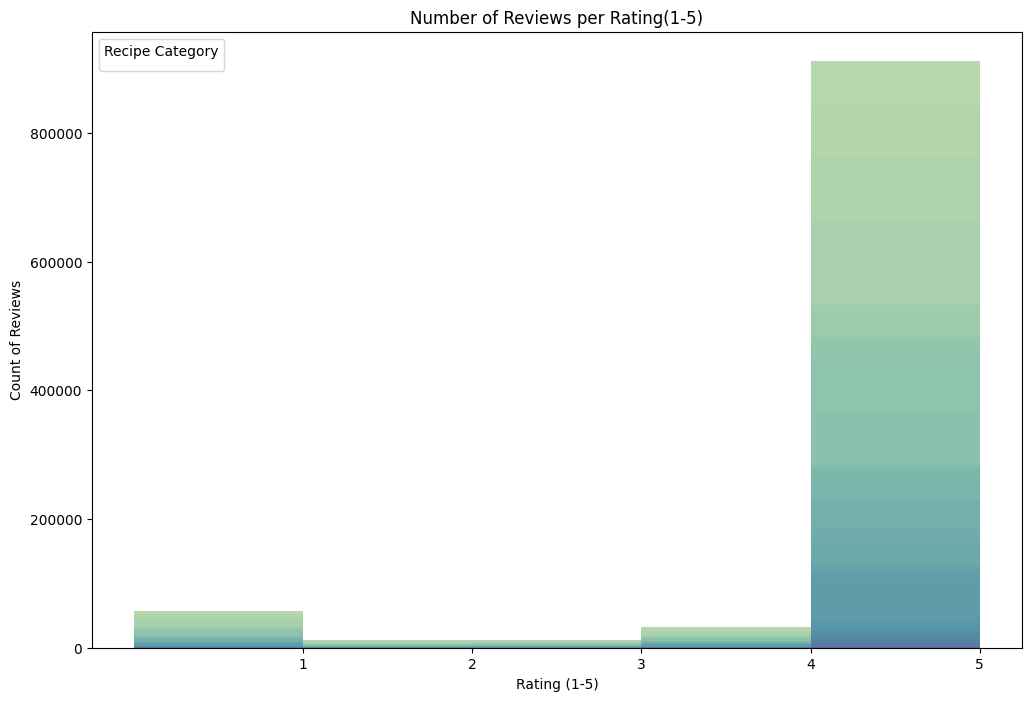

In [36]:
# Histogram of Rating Group by RecipeCategory
plt.figure(figsize=(12, 8))
sns.histplot(data=merged_df, x='Rating', hue='MappedCategory', multiple="stack",bins=5, palette='crest', element='bars',edgecolor=None)
plt.title('Number of Reviews per Rating(1-5)')
plt.xlabel('Rating (1-5)')
plt.ylabel('Count of Reviews')
plt.xticks(range(1, 6))
plt.legend(title='Recipe Category')
plt.show()

2.We create a Line Plot to check how rating was done over the years.


The results indicate that recipes were highest rated by users in the year 2006. and least rated in the year 2017





In [37]:
#Check unique years under DateSubmitted column
unique_years = merged_df['DateSubmitted'].dt.year.unique()
print(unique_years)

[2000 2001 2002 2005 2003 2006 2004 2007 2020 2016 2018 2017 2008 2019
 2009 2010 2011 2012 2013 2014 2015]


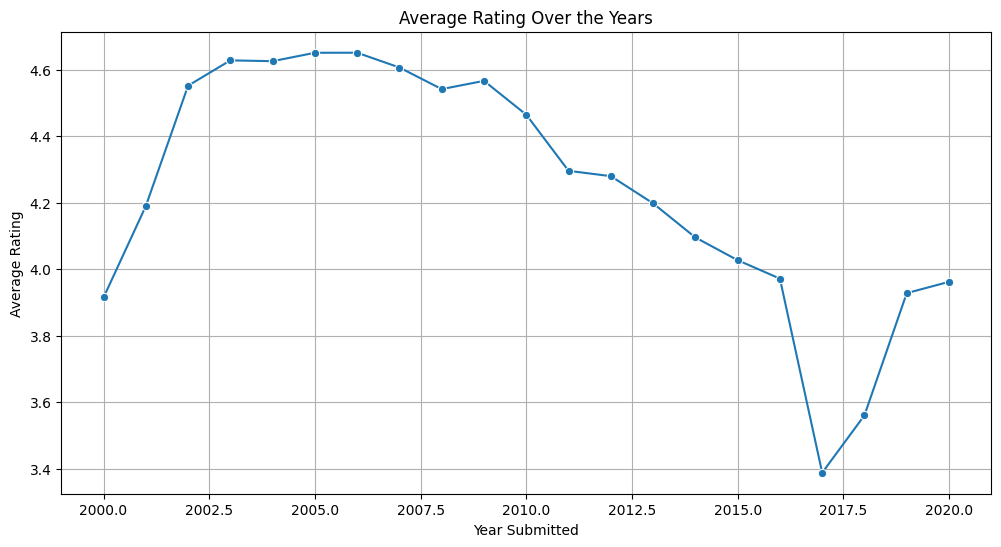

In [38]:
# Ensure 'DateSubmitted' is in datetime format
merged_df['DateSubmitted'] = pd.to_datetime(merged_df['DateSubmitted'])

# Extract the year
merged_df['SubmissionYear'] = merged_df['DateSubmitted'].dt.year

# Calculate the average rating per year
average_rating_by_year = merged_df.groupby('SubmissionYear')['Rating'].mean().reset_index()

# Sort by year
average_rating_by_year = average_rating_by_year.sort_values(by='SubmissionYear')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_rating_by_year, x='SubmissionYear', y='Rating', palette='crest',marker='o')
plt.title('Average Rating Over the Years')
plt.xlabel('Year Submitted')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

We do a Line Plot to checktotal count of reviews each year.

Results indicate that highest count of reviews was done in the year 2008 and least number of reviews was done in the year 2019



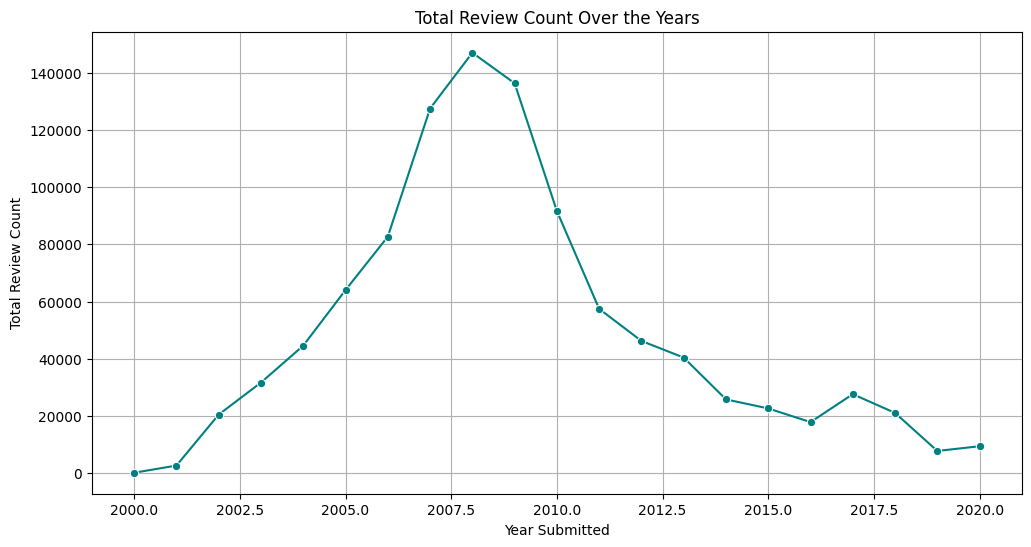

In [39]:
#visualization for reviewcount vs unique year

import matplotlib.pyplot as plt
# Aggregate review counts by year
review_count_by_year = merged_df.groupby('SubmissionYear').size().reset_index(name='ReviewCount')

# Sort by year
review_count_by_year = review_count_by_year.sort_values(by='SubmissionYear')

# Create the visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=review_count_by_year, x='SubmissionYear', y='ReviewCount', color='teal',marker='o')
plt.title('Total Review Count Over the Years')
plt.xlabel('Year Submitted')
plt.ylabel('Total Review Count')
plt.grid(True)
plt.show()

## Visualizations for Recipe Popularity


1. First Plot indicates the top 20 most and least reviewed recipes. This would mean they are the most and least popular recipes.

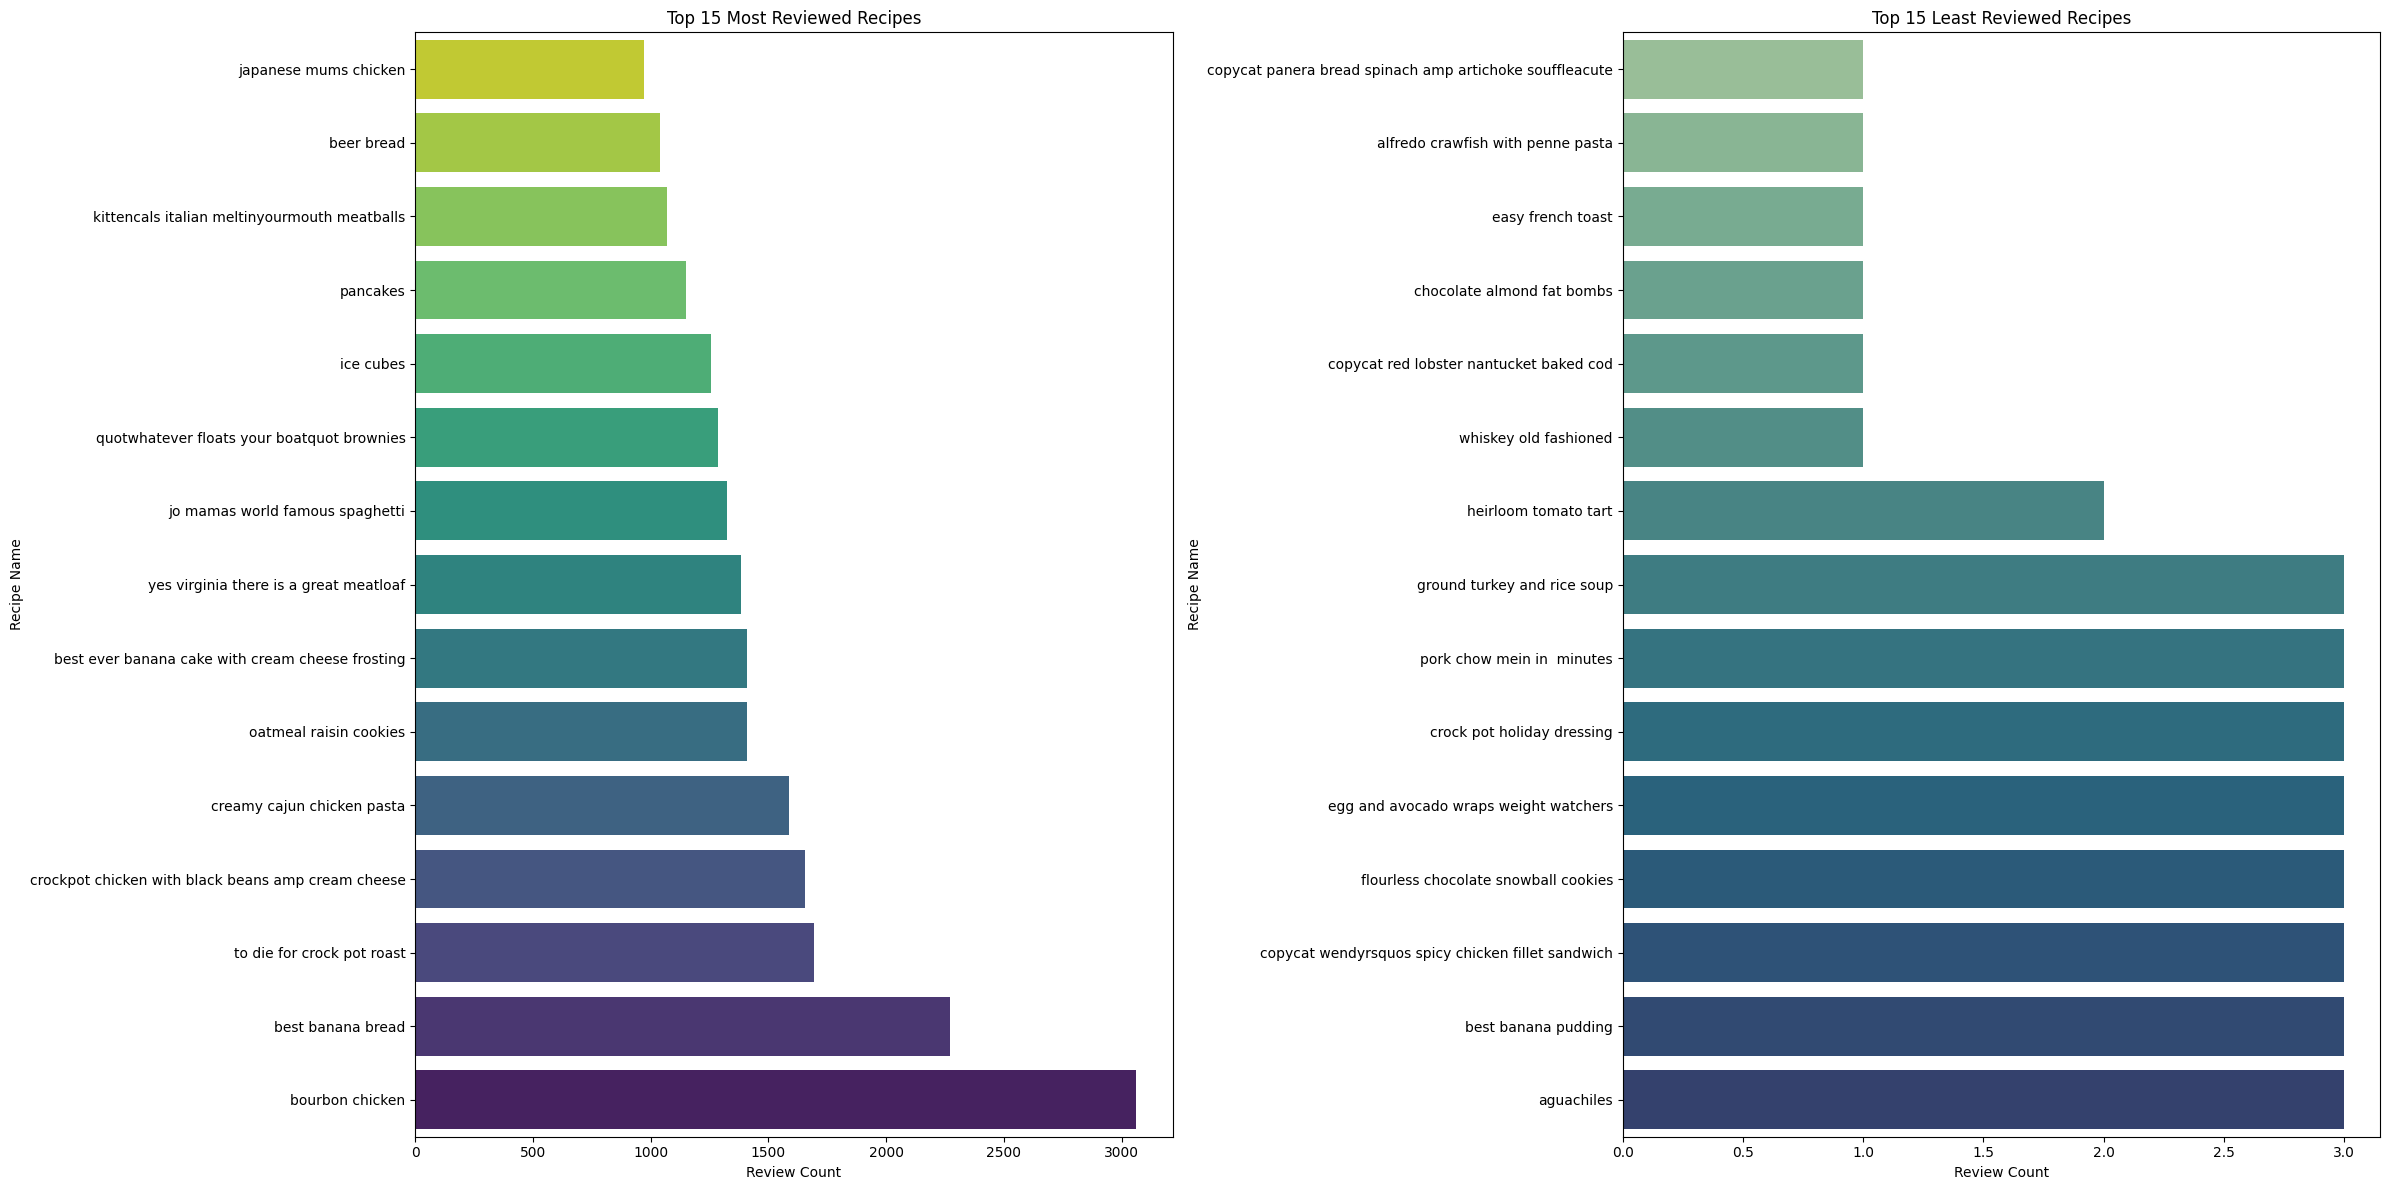

In [40]:
# Set N for top/bottom
top_n = 15

# Sort for most and least reviewed
recipe_reviews_summary = merged_df.groupby(['RecipeId', 'Name'])['ReviewCount'].first().reset_index()
most_reviewed_recipes = recipe_reviews_summary.sort_values(by='ReviewCount', ascending=False).head(top_n)
least_reviewed_recipes = recipe_reviews_summary.sort_values(by='ReviewCount', ascending=True).head(top_n)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 12), sharex=False)

# Plot: Most Reviewed
sns.barplot(ax=axes[0], x='ReviewCount', y='Name', data=most_reviewed_recipes, palette='viridis')
axes[0].set_title(f'Top {top_n} Most Reviewed Recipes')
axes[0].set_xlabel('Review Count')
axes[0].set_ylabel('Recipe Name')
axes[0].invert_yaxis()  # Most at top

# Plot: Least Reviewed
sns.barplot(ax=axes[1], x='ReviewCount', y='Name', data=least_reviewed_recipes, palette='crest')
axes[1].set_title(f'Top {top_n} Least Reviewed Recipes')
axes[1].set_xlabel('Review Count')
axes[1].set_ylabel('Recipe Name')
#axes[1].invert_yaxis()  # Least at top

plt.tight_layout()
plt.show()


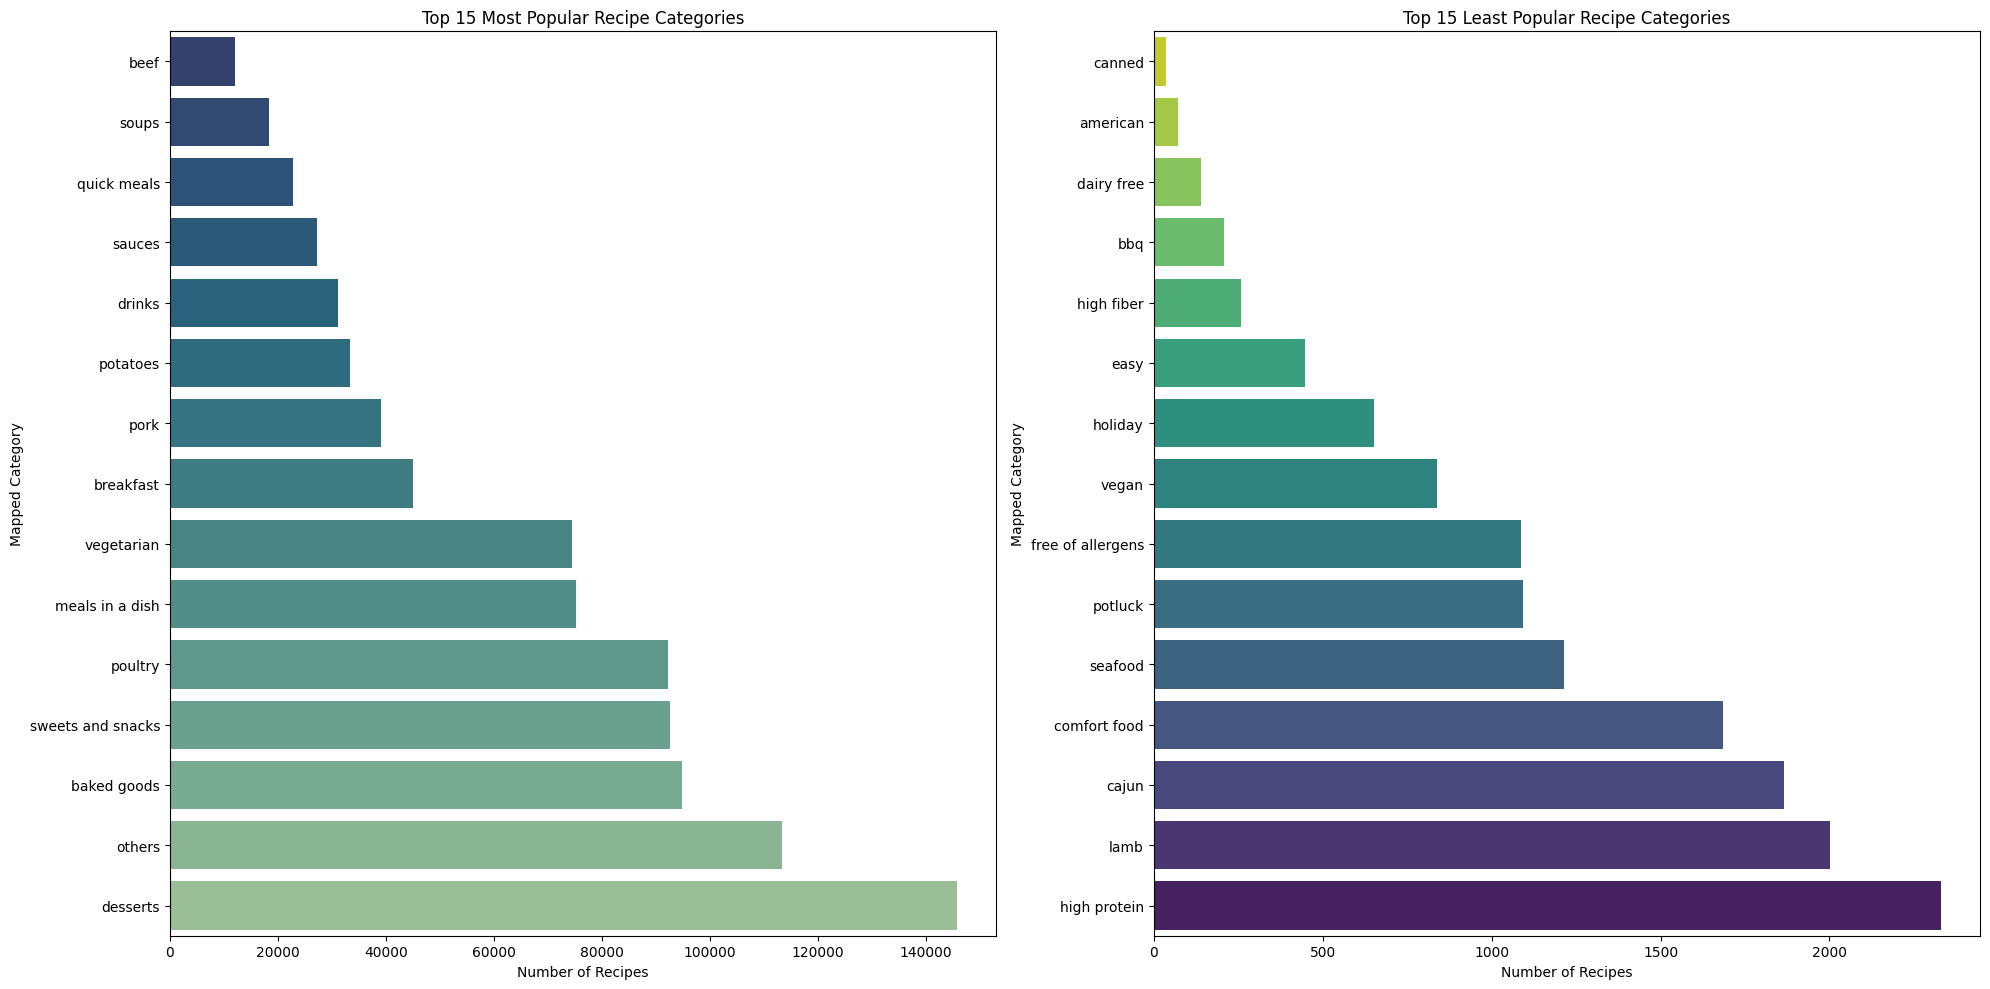

In [41]:
# Set the top and bottom N
top_n_categories = 15
bottom_n_categories = 15

# Prepare data
category_counts = merged_df['MappedCategory'].value_counts().reset_index()
category_counts.columns = ['MappedCategory', 'RecipeCount']
category_counts = category_counts.sort_values(by='RecipeCount', ascending=False)

# Get top and bottom categories
top_categories_plot = category_counts.head(top_n_categories)
bottom_categories_plot = category_counts.tail(bottom_n_categories)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=False)

# Plot: Most Popular Categories
sns.barplot(ax=axes[0], x='RecipeCount', y='MappedCategory', data=top_categories_plot, palette='crest')
axes[0].set_title(f'Top {top_n_categories} Most Popular Recipe Categories')
axes[0].set_xlabel('Number of Recipes')
axes[0].set_ylabel('Mapped Category')
axes[0].invert_yaxis()

# Plot: Least Popular Categories
sns.barplot(ax=axes[1], x='RecipeCount', y='MappedCategory', data=bottom_categories_plot, palette='viridis')
axes[1].set_title(f'Top {bottom_n_categories} Least Popular Recipe Categories')
axes[1].set_xlabel('Number of Recipes')
axes[1].set_ylabel('Mapped Category')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


##Visualizations for Nutrition Distribution

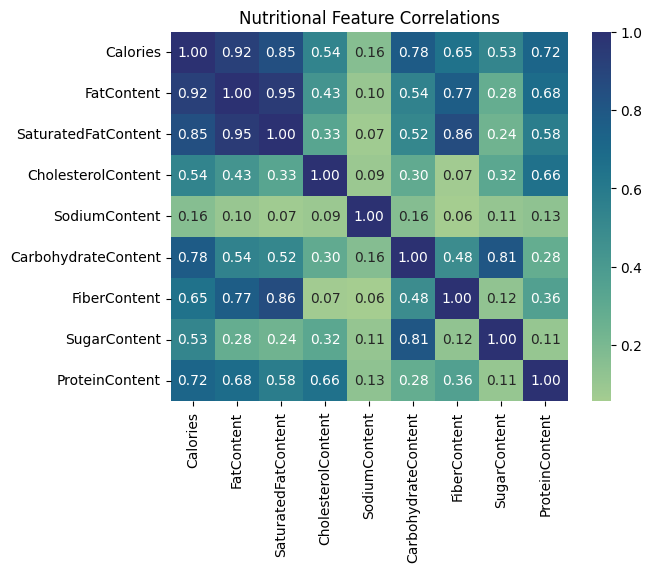

In [42]:
nutrition_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
                  'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                  'SugarContent', 'ProteinContent']
corr = merged_df[nutrition_cols].corr()

sns.heatmap(corr, annot=True,cmap='crest', fmt=".2f")
plt.title('Nutritional Feature Correlations')
plt.show()

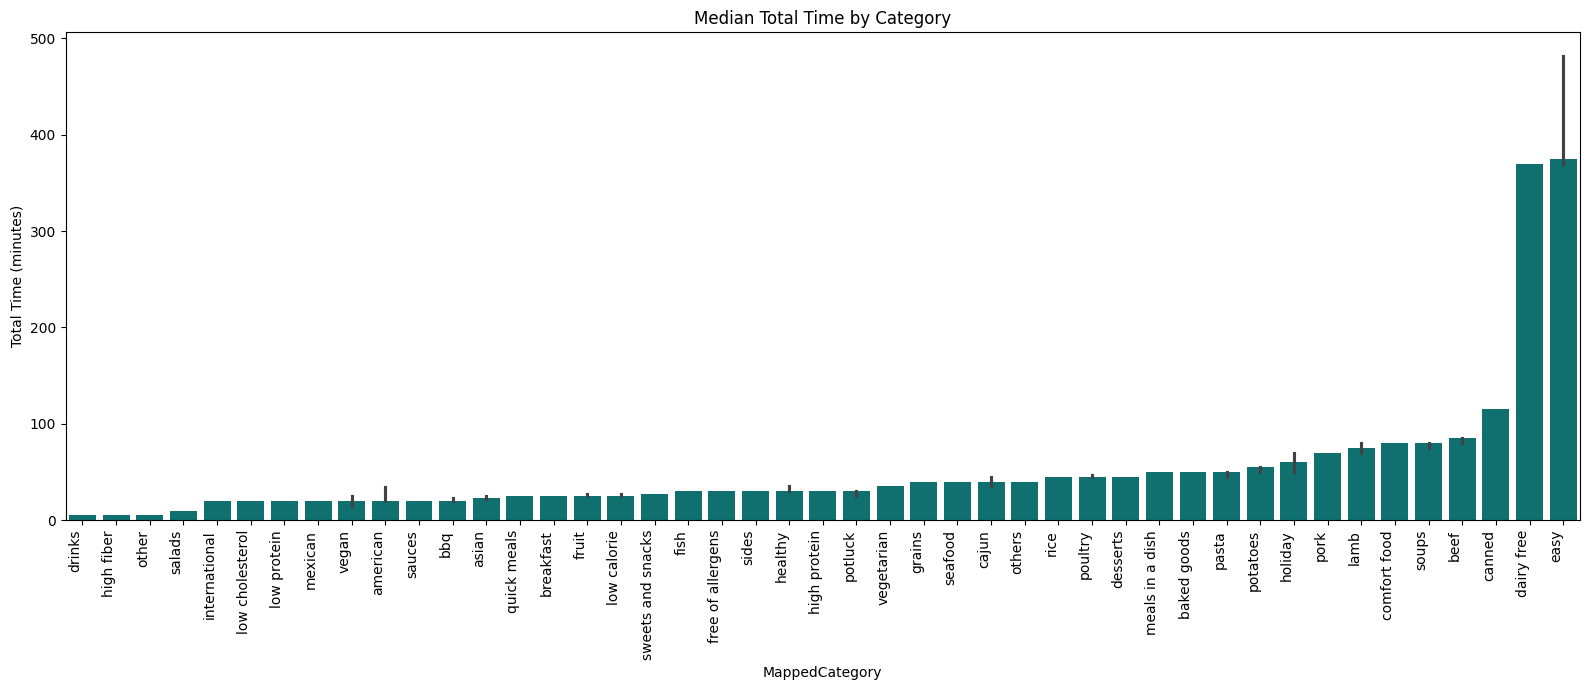

In [43]:
# Sort categories by median TotalTimeMinutes (ascending order)
category_order = (
    merged_df.groupby('MappedCategory')['TotalTimeMinutes']
    .median()
    .sort_values(ascending=True)  # Ascending = smallest to largest
    .index
)
plt.figure(figsize=(16, 7))
sns.barplot(data=merged_df, x='MappedCategory', y='TotalTimeMinutes', estimator='median', color='teal',order=category_order)
plt.title('Median Total Time by Category')
plt.xticks(rotation=45)
plt.ylabel('Total Time (minutes)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

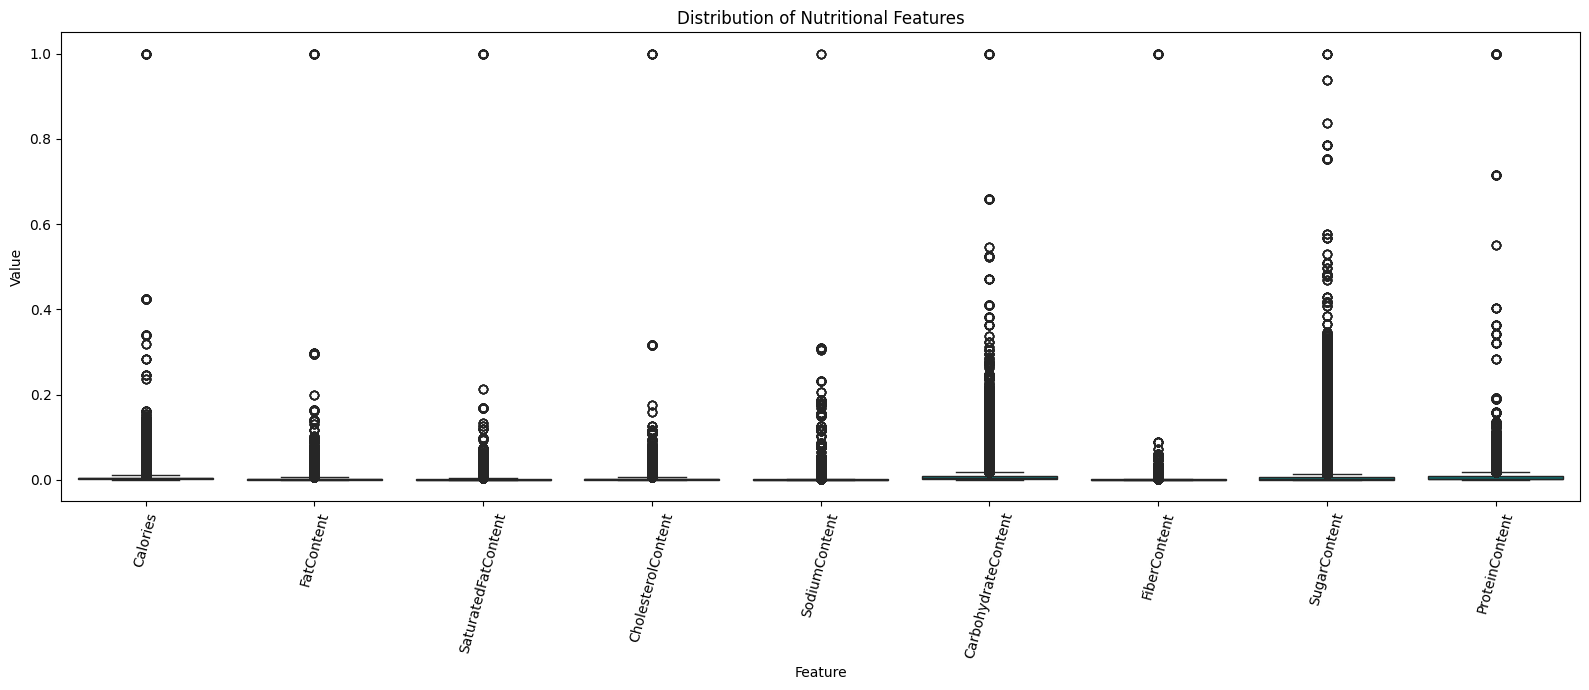

In [44]:
# Melt the DataFrame to long format
numeric_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
                 'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                  'SugarContent', 'ProteinContent']

melted = merged_df[numeric_cols].melt(var_name='Feature', value_name='Value')

# Boxplot for all features
plt.figure(figsize=(16, 7))
sns.boxplot(data=melted, x='Feature', y='Value', color='teal')
plt.title('Distribution of Nutritional Features')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

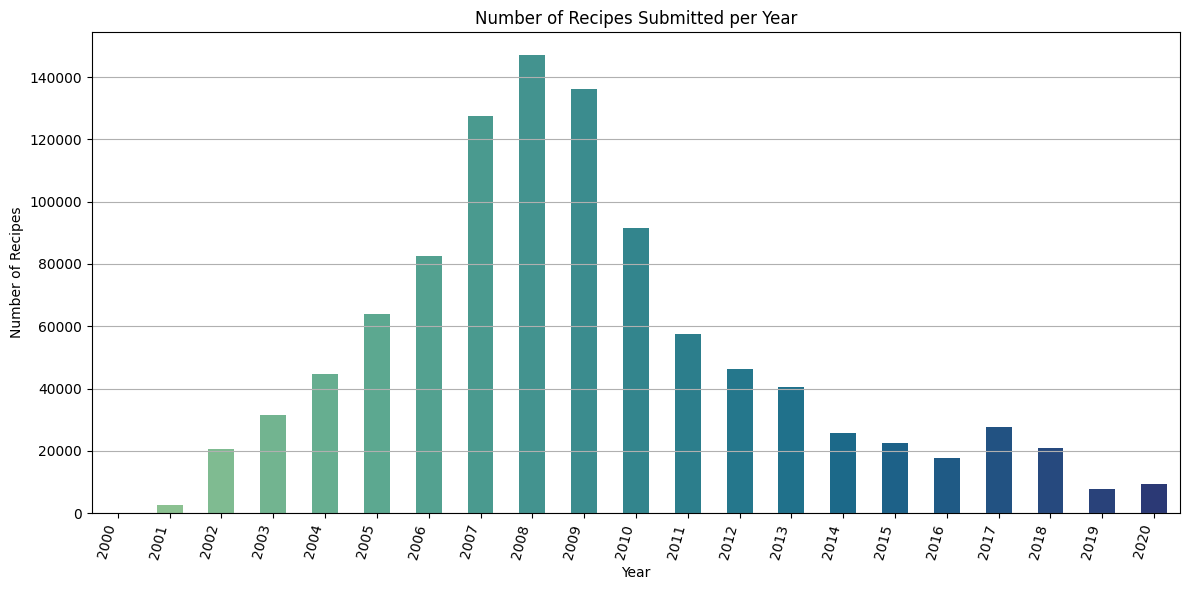

In [45]:
# Extract the submission year from 'DateSubmitted'
merged_df['SubmissionYear'] = merged_df['DateSubmitted'].dt.year

# Count the number of recipes submitted each year
recipes_per_year = merged_df['SubmissionYear'].value_counts().sort_index()

# Create the color palette
colors = sns.color_palette('crest', n_colors=len(recipes_per_year))

# Create the visualization
plt.figure(figsize=(12, 6))
recipes_per_year.plot(kind='bar', color=colors)
plt.title('Number of Recipes Submitted per Year')
plt.xlabel('Year')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=75, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [46]:
merged_df.columns

Index(['ReviewId', 'RecipeId', 'Rating', 'Review', 'DateSubmitted',
       'DateModified', 'Name', 'AuthorId_recipe', 'DatePublished',
       'Description', 'Images', 'RecipeCategory', 'AggregatedRating',
       'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent',
       'CholesterolContent', 'SodiumContent', 'CarbohydrateContent',
       'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings',
       'RecipeInstructions', 'CookTimeMinutes', 'PrepTimeMinutes',
       'TotalTimeMinutes', 'Ingredients', 'Quantities', 'KeywordList',
       'RecipeId_encoded', 'MappedCategory', 'SubmissionYear'],
      dtype='object')

Due to the size of the dataset, we will proceed with the years 2018, 2019 and 2020 as a subset of the dataset.

In [47]:
# Convert to datetime to short date
merged_df['DateSubmitted'] = pd.to_datetime(merged_df['DateSubmitted'])

# subset data where year >= 2018
merged_df= merged_df[merged_df['DateSubmitted'].dt.year >= 2018]

merged_df.head()

,ReviewId,RecipeId,Rating,Review,DateSubmitted,DateModified,Name,AuthorId_recipe,DatePublished,Description,...,RecipeInstructions,CookTimeMinutes,PrepTimeMinutes,TotalTimeMinutes,Ingredients,Quantities,KeywordList,RecipeId_encoded,MappedCategory,SubmissionYear
34429,52806,33113,5.0,"This was great,loved it! I also made your Orie...",2020-01-14 01:37:19+00:00,2020-01-14 01:37:19+00:00,thai dipping sauce for spring wrap or egg rolls,4470,2002-07-03 20:11:00+00:00,this is very tasty and low fat dipping sauce ...,...,whisk together all the ingredients in a small ...,10.0,5.0,15.0,"[water, cornstarch, seasoned rice vinegar, bro...","[3⁄4, 2, 1⁄3, 1⁄4, 1 1⁄2, 1, 2, 1⁄2]","[beans, thai, asian, mins, for, large, groups,...",8903,sauces,2020
89401,131383,51716,5.0,"Halfed the butter, used light sour cream and i...",2018-09-27 18:52:00+00:00,2018-09-27 18:52:00+00:00,corn casserole,67986,2003-01-16 20:19:00+00:00,if you like the star sour cream cornbread reci...,...,in large bowl mix together butter sour cream a...,60.0,5.0,65.0,"[butter, sour cream, egg, whole kernel corn, c...","[1⁄2, 1, 1, 1, 1, 4 1⁄2, 1]","[vegetable, weeknight, oven, hours, easy]",13978,sides,2018
96040,140879,26191,5.0,Update 3/25/18: I came here to get the recipe ...,2018-03-25 19:40:52+00:00,2018-03-25 19:40:52+00:00,the best all purpose cleaner,15205,2002-04-24 09:23:00+00:00,this is by far the best all purpose cleaner iv...,...,pour ingredients into empty gallon container o...,0.0,5.0,5.0,[water],"[1, 1⁄2, 1, None]","[mins, easy]",6758,other,2018
100503,147050,8534,5.0,I think this is my favorite pasta w/ asparagus...,2020-10-18 14:55:46+00:00,2020-10-18 14:55:46+00:00,baked pasta with asparagus pasta al forno con ...,3288,2001-01-01 21:55:00+00:00,i love fresh asparagus recipes got this one o...,...,wash asparagus remove any tough stalks and cut...,20.0,30.0,50.0,"[penne pasta, asparagus, butter, ricotta chees...","[14, 2, 4, None, None, 10, 1, 4, 3]","[cheese, vegetable, european, potluck, spring,...",1064,meals in a dish,2020
118420,172106,17344,5.0,This was Excellent! I was looking for somethin...,2020-11-08 13:13:51+00:00,2020-11-08 13:13:51+00:00,crushed saltine meatloaf,28846,2002-01-17 17:14:00+00:00,make and share this crushed saltine meatloaf r...,...,mix all of the above ingredients together unti...,45.0,15.0,60.0,"[lean ground beef, onion, green pepper, egg, t...","[1 1⁄2, 21, 1⁄3, 1⁄3, 1, 1, 1, None, None]","[meat, mins, oven]",3966,comfort food,2020


#PREPROCESSING

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, silhouette_score

import nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
def tokenize_and_preprocess(reviews):
    import re
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import SnowballStemmer

    # Ensure required resources are downloaded
    nltk.download('punkt')
    nltk.download('stopwords')
    # Get English stop words
    stop_words = stopwords.words('english')
    patt = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s+')

    # Regex for mentions, hashtags, URLs
    mention_hashtag_url_regex = r'(@\w+|#\w+|http\S+|www\S+)'

    # Step 1: Lowercase, remove numbers, remove mentions, hashtags, URLs, stopwords
    preproc_step1 = (
        reviews
        .str.lower()
        .str.replace(r'[0-9]+', '', regex=True)
        .str.replace(mention_hashtag_url_regex, '', regex=True)
        .str.replace(patt, '', regex=True)
    )

    # Step 2: Tokenize
    preproc1_tokenized = preproc_step1.apply(word_tokenize)

    # Step 3: Clean and stem
    def remove_punct_and_stem(doc_tokenized):
        stemmer = SnowballStemmer('english')
        doc_tokenized = [word for word in doc_tokenized if word.isalpha() and word != 'rt']
        filtered_stemmed_tok = [stemmer.stem(tok) for tok in doc_tokenized]
        return " ".join(filtered_stemmed_tok)

    # Step 4: Apply to each tokenized tweet
    preprocessed = preproc1_tokenized.apply(remove_punct_and_stem)

    return preprocessed


In [50]:
top_categories = merged_df['RecipeCategory'].value_counts().head(5).index
merged_df_top_cat = merged_df[merged_df['RecipeCategory'].isin(top_categories)].copy()

##NLP Visualization

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


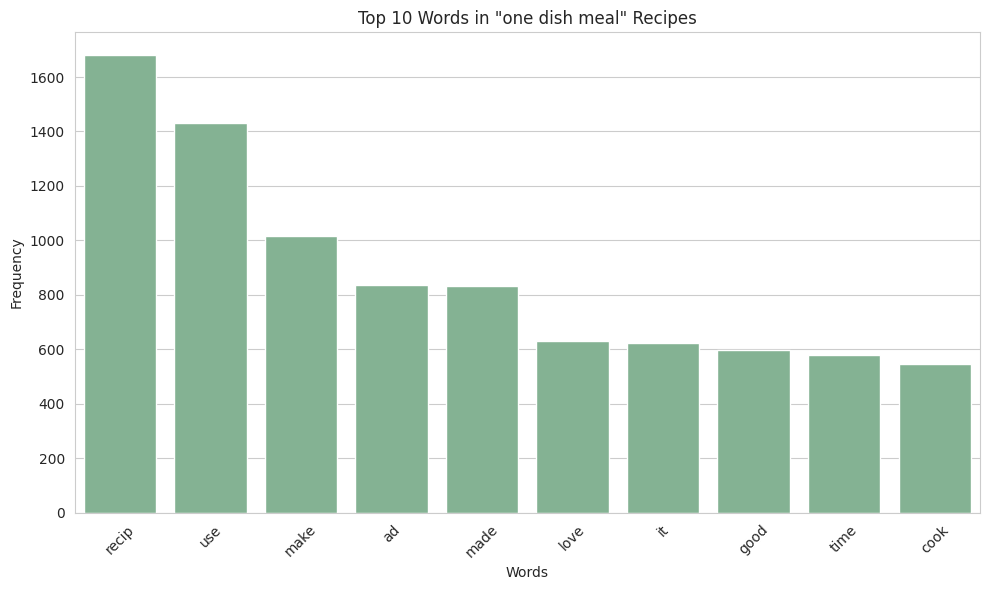

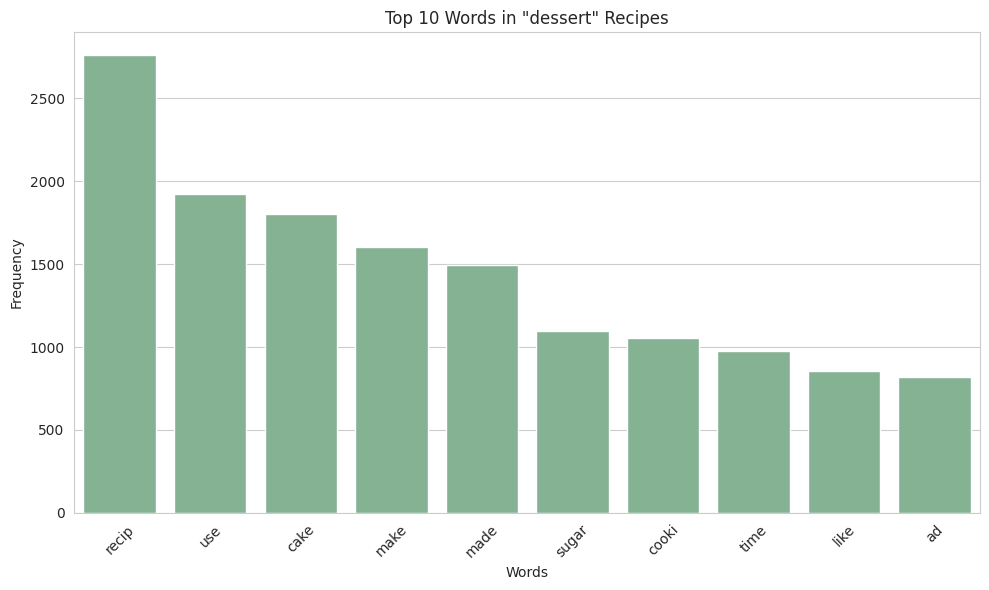

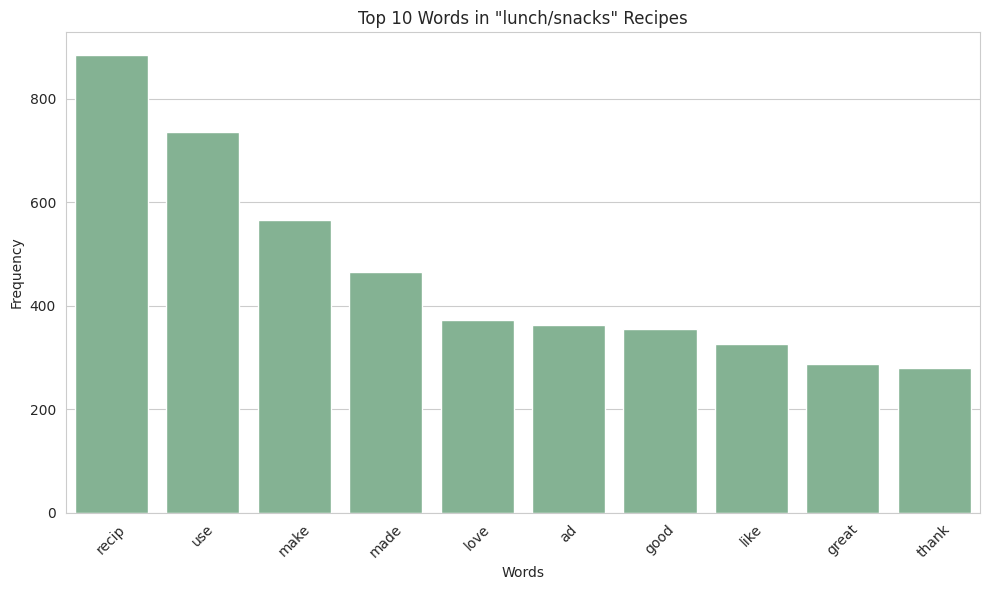

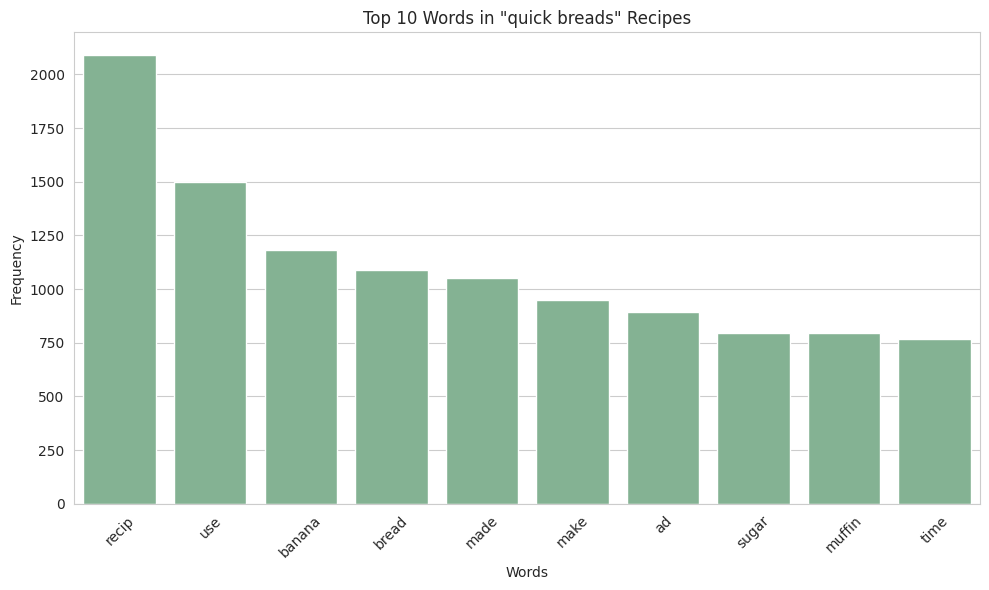

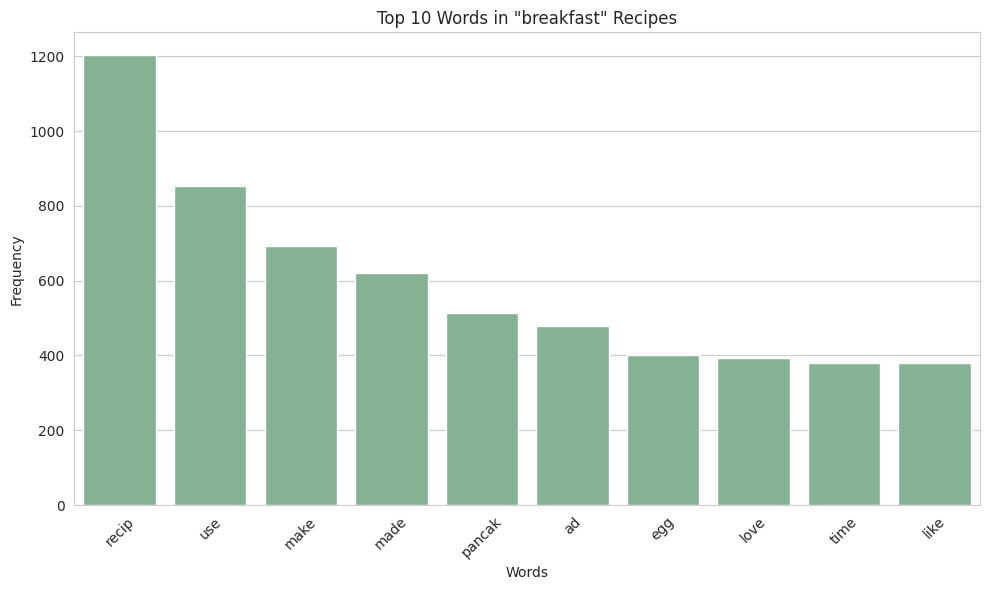

In [51]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Download required tokenizer
nltk.download('punkt_tab', force=True)

# Apply preprocessing to the full dataframe
merged_df['preprocessed_text'] = tokenize_and_preprocess(merged_df['Review'])

# Filter the top 5 recipe categories
top_categories = merged_df['RecipeCategory'].value_counts().head(5).index
merged_df_top_cat = merged_df[merged_df['RecipeCategory'].isin(top_categories)].copy()

# Tokenize preprocessed text
merged_df_top_cat['tokens'] = merged_df_top_cat['preprocessed_text'].apply(lambda x: x.split())

# Function to get top N words for a given category
def get_top_words_by_category(df, category_name, n=10):
    tokens = df[df['RecipeCategory'] == category_name]['tokens'].sum()
    counter = Counter(tokens)
    return counter.most_common(n)

# Set seaborn style and palette
sns.set_style("whitegrid")
sns.set_palette("crest")

# Plot top words for each category
categories = merged_df_top_cat['RecipeCategory'].unique()
for category in categories:
    top_words = get_top_words_by_category(merged_df_top_cat, category)
    if not top_words:
        continue

    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(counts))
    plt.title(f'Top 10 Words in \"{category}\" Recipes')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [52]:
#Extract top 10 words used in our dataframe ingredient column
def clean_ingredient_lists(ingredient_col):
    import re
    from nltk.corpus import stopwords
    from nltk.stem import SnowballStemmer

    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')

    def clean_ingredient_list(Ingredient):
        cleaned = []
        for item in Ingredient:
            item = item.lower()
            item = re.sub(r'\d+', '', item)  # Remove numbers
            item = re.sub(r'[^\w\s]', '', item)  # Remove punctuation
            if item and item not in stop_words:
                stemmed = stemmer.stem(item)
                cleaned.append(stemmed)
        return cleaned  # or " ".join(cleaned) if you prefer strings

    return ingredient_col.apply(clean_ingredient_list)

#cleaning Ingredient column
merged_df['cleaned_ingredients'] = clean_ingredient_lists(merged_df['Ingredients'])

# Flattening the the list
all_ingredients = merged_df['cleaned_ingredients'].sum()

# Count frequencies and create a table
top_ingredients = Counter(all_ingredients).most_common(10)
summary_table = pd.DataFrame(top_ingredients, columns=['Ingredients', 'Count'])


print(summary_table)

        Ingredients  Count
0              salt  21023
1            butter  14610
2               egg  13190
3             sugar  11640
4             flour   8632
5             onion   8187
6             water   7623
7              milk   7151
8       baking powd   5914
9  allpurpose flour   5785


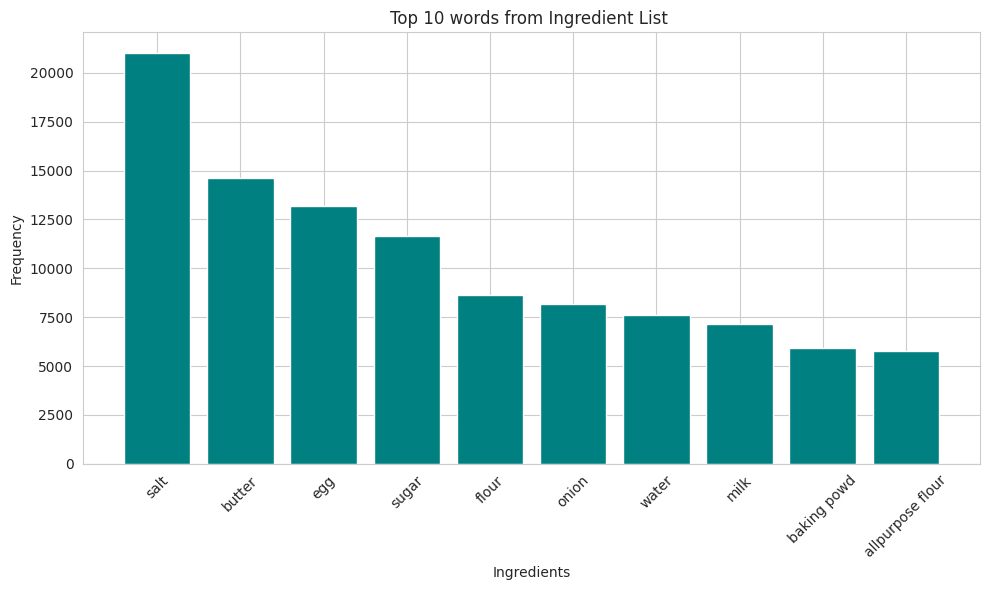

In [53]:
#Plot a bar chart of top ingredients
plt.figure(figsize=(10, 6))
plt.bar(summary_table['Ingredients'], summary_table['Count'], color='teal')
plt.title('Top 10 words from Ingredient List ')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    Keyword  Count
0       min  24513
1      easi  20221
2       low  11911
3      hour  10573
4      oven   9547
5      meat   9215
6    friend   7293
7      cook   7240
8   healthi   6823
9  inexpens   6619


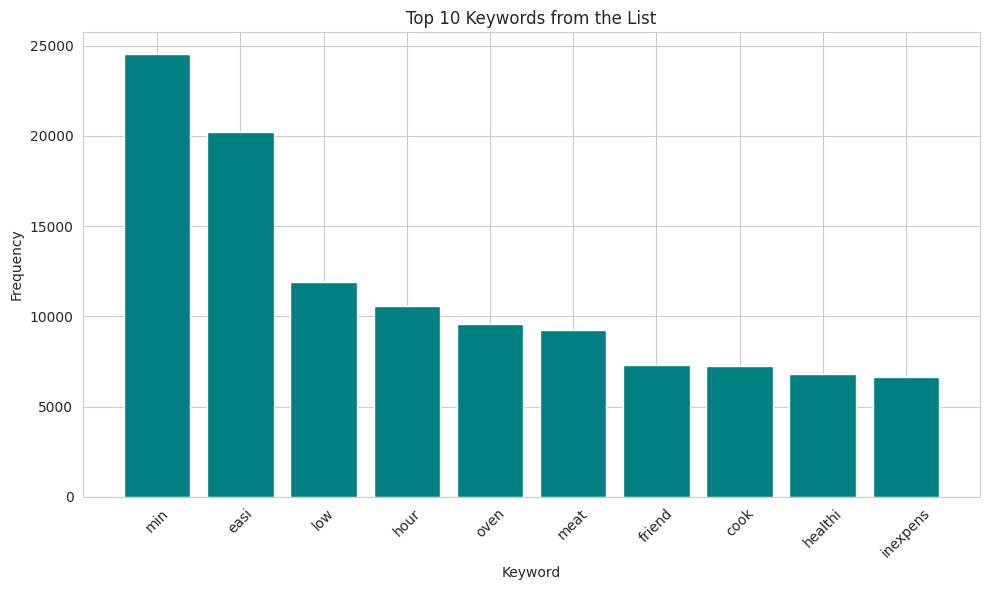

In [54]:
# cleaning step
def clean_KeywordList_lists(KeywordList_col):
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')

    def clean_KeywordList_list(KeywordList):
        cleaned = []
        for item in KeywordList:
            item = item.lower()
            item = re.sub(r'\d+', '', item)  # Remove numbers
            item = re.sub(r'[^\w\s]', '', item)  # Remove punctuation
            if item and item not in stop_words:
                stemmed = stemmer.stem(item)
                cleaned.append(stemmed)
        return cleaned

    return KeywordList_col.apply(clean_KeywordList_list)

# apply cleaning
merged_df['cleaned_KeywordList'] = clean_KeywordList_lists(merged_df['KeywordList'])

# Flattening the list
all_KeywordList = merged_df['cleaned_KeywordList'].sum()

#Count frequencies and create a table
top_KeywordList = Counter(all_KeywordList).most_common(10)
summary_table = pd.DataFrame(top_KeywordList, columns=['Keyword', 'Count'])


print(summary_table)

#Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(summary_table['Keyword'], summary_table['Count'], color='teal')
plt.title('Top 10 Keywords from the List')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [135]:
merged_df.head()


,ReviewId,RecipeId,Rating,Review,DateSubmitted,DateModified,Name,AuthorId_recipe,DatePublished,Description,...,Ingredients,Quantities,KeywordList,RecipeId_encoded,MappedCategory,SubmissionYear,preprocessed_text,cleaned_ingredients,cleaned_KeywordList,IngredientText
0,52806,33113,5.0,"This was great,loved it! I also made your Orie...",2020-01-14 01:37:19+00:00,2020-01-14 01:37:19+00:00,thai dipping sauce for spring wrap or egg rolls,4470,2002-07-03 20:11:00+00:00,this is very tasty and low fat dipping sauce ...,...,"[water, cornstarch, seasoned rice vinegar, bro...","[3⁄4, 2, 1⁄3, 1⁄4, 1 1⁄2, 1, 2, 1⁄2]","[beans, thai, asian, mins, for, large, groups,...",1655,sauces,2020,great love it also made orient dip sauc great ...,"[water, cornstarch, seasoned rice vinegar, bro...","[bean, thai, asian, min, larg, group, easi]",water cornstarch seasoned rice vinegar brown s...
1,131383,51716,5.0,"Halfed the butter, used light sour cream and i...",2018-09-27 18:52:00+00:00,2018-09-27 18:52:00+00:00,corn casserole,67986,2003-01-16 20:19:00+00:00,if you like the star sour cream cornbread reci...,...,"[butter, sour cream, egg, whole kernel corn, c...","[1⁄2, 1, 1, 1, 1, 4 1⁄2, 1]","[vegetable, weeknight, oven, hours, easy]",2573,sides,2018,half butter use light sour cream wonder still ...,"[butter, sour cream, egg, whole kernel corn, c...","[veget, weeknight, oven, hour, easi]",butter sour cream egg whole kernel corn chedda...
2,140879,26191,5.0,Update 3/25/18: I came here to get the recipe ...,2018-03-25 19:40:52+00:00,2018-03-25 19:40:52+00:00,the best all purpose cleaner,15205,2002-04-24 09:23:00+00:00,this is by far the best all purpose cleaner iv...,...,[water],"[1, 1⁄2, 1, None]","[mins, easy]",1242,other,2018,updat came get recip refil spray bottl use cle...,[water],"[min, easi]",water
3,147050,8534,5.0,I think this is my favorite pasta w/ asparagus...,2020-10-18 14:55:46+00:00,2020-10-18 14:55:46+00:00,baked pasta with asparagus pasta al forno con ...,3288,2001-01-01 21:55:00+00:00,i love fresh asparagus recipes got this one o...,...,"[penne pasta, asparagus, butter, ricotta chees...","[14, 2, 4, None, None, 10, 1, 4, 3]","[cheese, vegetable, european, potluck, spring,...",184,meals in a dish,2020,think favorit pasta asparagus recip time anyon...,"[penne pasta, asparagus, butter, ricotta chees...","[chees, veget, european, potluck, spring, min,...",penne pasta asparagus butter ricotta cheese ol...
4,172106,17344,5.0,This was Excellent! I was looking for somethin...,2020-11-08 13:13:51+00:00,2020-11-08 13:13:51+00:00,crushed saltine meatloaf,28846,2002-01-17 17:14:00+00:00,make and share this crushed saltine meatloaf r...,...,"[lean ground beef, onion, green pepper, egg, t...","[1 1⁄2, 21, 1⁄3, 1⁄3, 1, 1, 1, None, None]","[meat, mins, oven]",709,comfort food,2020,excel look someth quick easi perfect thank car...,"[lean ground beef, onion, green pepp, egg, tom...","[meat, min, oven]",lean ground beef onion green pepper egg tomato...


#MODELING

##Collaborative Filtering
Implement Collaborative Filtering that makes recommendations by learning patterns from user behavior. It recommends items liked by similar users. It checks who rated what not why. We will use
Matrix Factorization via SVD (Singular Value Decomposition)
Explicit feedback (user ratings)

In [114]:
!pip uninstall numpy -y
!pip install numpy==1.26.4
!pip install surprise


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [130]:
import random

sample_users = random.sample(list(train_user_ids), 3)

for user_id in sample_users:
    print(f" \ Recommendations for user {user_id}")
    rated = ratings_df[ratings_df['AuthorId_recipe'] == user_id]['RecipeId_encoded'].tolist()
    candidates = [rid for rid in merged_df['RecipeId_encoded'].unique() if rid not in rated]
    predictions = [(rid, svd.predict(user_id, rid).est) for rid in candidates]
    top_preds = sorted(predictions, key=lambda x: x[1], reverse=True)[:5]

    for rid, score in top_preds:
        name = merged_df[merged_df['RecipeId_encoded'] == rid]['Name'].values[0]
        print(f"{name} (Recipe ID {rid}) — Predicted Rating: {score:.2f}")


 \ Recommendations for user 517900
tomato free ketchup (Recipe ID 7346) — Predicted Rating: 4.19
hungarian mushroom soup from the moosewood cookbook (Recipe ID 6167) — Predicted Rating: 4.16
scalloped potatoes and ham (Recipe ID 130) — Predicted Rating: 4.14
yummiest ever baked mac and cheese (Recipe ID 11479) — Predicted Rating: 4.13
baconinfused butternut squash soup (Recipe ID 3784) — Predicted Rating: 4.11
 \ Recommendations for user 335609
apple bread (Recipe ID 896) — Predicted Rating: 4.08
crock pot white chicken chili (Recipe ID 5459) — Predicted Rating: 4.00
snickerdoodlebundt cake (Recipe ID 11882) — Predicted Rating: 3.96
roasted asparagus (Recipe ID 2521) — Predicted Rating: 3.94
homemade mint chocolate chip ice cream (Recipe ID 11451) — Predicted Rating: 3.93
 \ Recommendations for user 526614
pork tenderloin (Recipe ID 136) — Predicted Rating: 4.41
cajun crab dip (Recipe ID 7500) — Predicted Rating: 4.41
perfect blueberry pie filling (Recipe ID 8856) — Predicted Rating: 4

Collaborative filtering with function to handle the cold start problem

In [124]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Step 1: Prepare data
ratings_df = merged_df[['AuthorId_recipe', 'RecipeId_encoded', 'Rating']].dropna()

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df, reader)

# Step 2: Train SVD model
trainset, testset = train_test_split(data, test_size=0.2)
svd = SVD()
svd.fit(trainset)

# Fallback: Return top-N most popular recipes by rating count + average score
def fallback_recommendations(top_n=5):
    top_recipes = (
        merged_df.groupby('RecipeId_encoded')
        .agg({'Rating': ['mean', 'count']})
        .reset_index()
    )
    top_recipes.columns = ['RecipeId_encoded', 'AvgRating', 'RatingCount']
    top_recipes = top_recipes.sort_values(by=['RatingCount', 'AvgRating'], ascending=False)

    top_ids = top_recipes['RecipeId_encoded'].head(top_n)
    return merged_df[merged_df['RecipeId_encoded'].isin(top_ids)]['Name'].unique().tolist()

# Step 3: Recommend top-N recipes for a given user, with cold-start handling
def recommend_for_user(user_id, top_n=5):
  # Ensure user_id is int to match data type
    user_id = int(user_id)
    all_recipes = merged_df['RecipeId_encoded'].unique()

    # Find recipes this user has already rated
    rated = ratings_df[ratings_df['AuthorId_recipe'] == user_id]['RecipeId_encoded'].tolist()

    # Cold-start: If user has no ratings, use fallback
    if not rated:
        return fallback_recommendations(top_n)

    # Predict ratings for unseen recipes
    candidates = [rid for rid in all_recipes if rid not in rated]
    predictions = [(rid, svd.predict(user_id, rid).est) for rid in candidates]
    top_preds = sorted(predictions, key=lambda x: x[1], reverse=True)[:top_n]

     # Build ordered list of recommended recipe names
    recommended = []
    for rid, _ in top_preds:
        name = merged_df.loc[merged_df['RecipeId_encoded'] == rid, 'Name'].values[0]
        recommended.append(name)
    return recommended


In [132]:
#Test the model using real data
recommend_for_user('335609', top_n=5)

['apple bread',
 'crock pot white chicken chili',
 'snickerdoodlebundt cake',
 'roasted asparagus',
 'homemade mint chocolate chip ice cream']

###**Evaluation**

In [134]:
from surprise import accuracy

# Step 1: Predict ratings on the test set
predictions = svd.test(testset)

# Step 2: Calculate RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f"\nEvaluation Results:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


RMSE: 2.0022
MAE:  1.6145

Evaluation Results:
Root Mean Squared Error (RMSE): 2.0022
Mean Absolute Error (MAE): 1.6145


 ## Content Based Filtering
 Implement Content-Based recommendation system using TF-IDF and Nearest Neighbors.
This recommends recipes that are similar in content to what the user likes. It uses features of the items e.g ingredients, keywords, descriptions as opposed to user behavior. TF-IDF helps weigh important words while reducing the impact of common words

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load and prep text data
merged_df['IngredientText'] = merged_df['Ingredients'].astype(str).str.replace('[\[\]\',"]', '', regex=True)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Reset index to align DataFrame rows with TF-IDF matrix
merged_df = merged_df.reset_index(drop=True)

# TF-IDF.
#Transforms the ingredient text into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(merged_df['IngredientText'])

# Fit Nearest Neighbors model
#Train Nearest Neighbors model using cosine similarity to find similar recipes based on their ingredient text.
nn_model = NearestNeighbors(metric='cosine', algorithm='brute')
nn_model.fit(X)

# create a name-to-index mapping
recipe_indices = pd.Series(merged_df.index, index=merged_df['Name']).drop_duplicates()

# Do a Fuzzy match
#Use approximate string matching (Levenshtein distance) to handle typos or slight name mismatches.
from difflib import get_close_matches
def get_closest_recipe_name(name):
    matches = get_close_matches(name, merged_df['Name'], n=1, cutoff=0.6)
    return matches[0] if matches else None

Below we create a recommendation function that given a recipe name:

*   Finds the closest actual recipe name.
*   Uses the trained model to find top N most similar recipes (excluding itself).
*   Returns their names, categories, ingredients, and ratings.


In [61]:
# create a function to iterate through and check for a possible match
def recommend_recipes(name, model=nn_model, top_n=5):
    name = get_closest_recipe_name(name)
    if not name:
        return f"No close match found for '{name}'"

    idx = recipe_indices[name]
    query_vec = X[idx]
    distances, indices_nn = model.kneighbors(query_vec, n_neighbors=top_n + 1)  # +1 to skip itself

    rec_indices = indices_nn[0][1:]  # exclude the original
    return merged_df[['Name', 'RecipeCategory', 'Ingredients', 'AggregatedRating']].iloc[rec_indices]

In [62]:
# Try a recipe

recommend_recipes('lasagna')

,Name,RecipeCategory,Ingredients,AggregatedRating
22677,make ahead italian sausage and pasta bake,one dish meal,"[Italian sausage, olive oil, onions, garlic cl...",5.0
1495,make ahead italian sausage and pasta bake,one dish meal,"[Italian sausage, olive oil, onions, garlic cl...",5.0
7291,make ahead italian sausage and pasta bake,one dish meal,"[Italian sausage, olive oil, onions, garlic cl...",5.0
1883,crispy cheesy chicken parmigiana,chicken breast,"[onion, garlic cloves, parsley, Italian-style ...",5.0
16567,italian meatball soup quick,one dish meal,"[beef broth, tomatoes with onion and garlic, I...",5.0


In [63]:
from sklearn.preprocessing import LabelEncoder

recipe_encoder = LabelEncoder()
author_encoder = LabelEncoder()

merged_df['RecipeId_encoded'] = recipe_encoder.fit_transform(merged_df['RecipeId'])

In [64]:
#Normalize Nutritional Features
from sklearn.preprocessing import MinMaxScaler

nutritional_cols = [
    'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
    'SugarContent', 'ProteinContent'
]

scaler = MinMaxScaler()
merged_df[nutritional_cols] = scaler.fit_transform(merged_df[nutritional_cols])

###**Evaluation**
We evaluate the perfomance of the Content Based Filtering Model using Precision@K. It evaluates how accurate the recommendations are by measuring how many of the top K recommended recipes are in the same category as the original recipe.

In [65]:
def precision_at_k(df, model, X, k=5):
    correct = 0
    total = 0

    for idx in range(len(df)):
        query_vec = X[idx]
        distances, indices = model.kneighbors(query_vec, n_neighbors=k + 1)

        true_category = df.iloc[idx]['RecipeCategory']
        recommended_indices = indices[0][1:]  # Exclude the query itself
        recommended_categories = df.iloc[recommended_indices]['RecipeCategory']

        # Count how many recommended items match the true category
        hits = sum(recommended_categories == true_category)
        correct += hits
        total += k

    precision = correct / total
    print(f'Precision@{k}: {precision:.4f}')
    return precision


In [66]:
precision_at_k(merged_df, nn_model, X, k=5)

Precision@5: 0.6971


0.697117202268431

The result of 0.6971 indicates that out of the top 5 recommendations or nearest neighbors returned by the model for each query point, about 70% of them on average are actually relevant or correct.
A result > 0.5 suggests that the model is performing reasonably well meaning most top 5 suggestions are relevant


##Deep Learning Model
The Deep Learning Recommender system uses neural networks to learn complex patterns between users and items.
It will learn non-linear relationships between users and items.
We will build a deep learning recommendation system using user IDs, recipe IDs, and ratings to predict how much a user will like a recipe, then recommend top-rated ones. We will use embedding layers to learn latent features for users and recipes.


In [80]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense
from tensorflow.keras.optimizers import Adam

# Drop NaNs
df = merged_df[['AuthorId_recipe', 'RecipeId_encoded', 'Rating']].dropna()

# Encode user and item IDs to integers
user_ids = df['AuthorId_recipe'].astype('category').cat.codes
item_ids = df['RecipeId_encoded'].astype('category').cat.codes

df['user'] = user_ids
df['item'] = item_ids

# Save mappings
user_lookup = dict(enumerate(df['AuthorId_recipe'].astype('category').cat.categories))
item_lookup = dict(enumerate(df['RecipeId_encoded'].astype('category').cat.categories))

# Also create mapping from raw ID to encoded index for use in recommendation
user_id_to_encoded = dict(zip(df['AuthorId_recipe'], df['user']))
item_id_to_encoded = dict(zip(df['RecipeId_encoded'], df['item']))

# Train/test split
train, test = train_test_split(df, test_size=0.2, random_state=42)


In [81]:
# Number of unique users and items
n_users = df['user'].nunique()
n_items = df['item'].nunique()
embedding_size = 50

# Inputs
user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

# Embeddings
user_embed = Embedding(n_users, embedding_size)(user_input)
item_embed = Embedding(n_items, embedding_size)(item_input)

# Flatten and dot product
user_vec = Flatten()(user_embed)
item_vec = Flatten()(item_embed)
dot_product = Dot(axes=1)([user_vec, item_vec])

# Optional: Dense layer for more learning
output = Dense(1)(dot_product)

# Build and compile
model = Model([user_input, item_input], output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train
model.fit([train['user'], train['item']], train['Rating'], epochs=5, verbose=1, validation_split=0.1)


Epoch 1/5
857/857 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 15.5244 - val_loss: 9.8017
Epoch 2/5
857/857 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 7.7878 - val_loss: 6.5772
Epoch 3/5
857/857 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 4.3056 - val_loss: 5.7649
Epoch 4/5
857/857 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 2.9783 - val_loss: 5.5754
Epoch 5/5
857/857 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 2.5981 - val_loss: 5.4730


In [75]:
def recommend_for_user_dl(user_raw_id, top_n=5):
    # Check if the user exists in training data
    if user_raw_id not in user_encoder.classes_:
        # Cold-start: recommend popular recipes
        fallback = (
            merged_df.groupby('RecipeId_encoded')
            .agg({'Rating': ['mean', 'count']})
            .reset_index()
        )
        fallback.columns = ['RecipeId_encoded', 'AvgRating', 'RatingCount']
        top_ids = fallback.sort_values(by=['RatingCount', 'AvgRating'], ascending=False).head(top_n)['RecipeId_encoded']
        return merged_df[merged_df['RecipeId_encoded'].isin(top_ids)]['Name'].unique().tolist()

    # Known user: proceed with model prediction
    user_encoded = user_encoder.transform([user_raw_id])[0]
    all_item_ids = np.arange(n_items)
    user_array = np.full(n_items, user_encoded)

    predictions = model.predict([user_array, all_item_ids], verbose=0).flatten()
    top_indices = predictions.argsort()[-top_n:][::-1]

    recommended_item_ids = [item_lookup[idx] for idx in top_indices]
    recommended_names = merged_df[merged_df['RecipeId_encoded'].isin(recommended_item_ids)]['Name'].unique().tolist()
    return recommended_names


We test the model by providing real userids from our dataset to see what recipes the model would recommend they try

In [82]:
# Pick one of your actual user IDs from the list
sample_user_id = 88099

# Recommend top 5 recipes for this user
recommendations = recommend_for_user_dl(sample_user_id, top_n=5)

# Print recommendations
print("I recommend that you try:")
for i, recipe in enumerate(recommendations, 1):
    print(f"{i}. {recipe}")


I recommend that you try:
1. cherry chicken salad
2. peanut butter pork tenderloin
3. parmesan and garlic breadsticks
4. best ever fettuccine alfredo
5. blueberry buttermilk waffles


###**Evaluation**

In [83]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense
from sklearn.metrics import mean_squared_error

# 1.Split the data
train_df, test_df = train_test_split(merged_df[['AuthorId_recipe', 'RecipeId_encoded', 'Rating']], test_size=0.2)

# 2.Fit encoders only on train data
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

train_df = train_df.dropna()
train_df['user'] = user_encoder.fit_transform(train_df['AuthorId_recipe'])
train_df['item'] = item_encoder.fit_transform(train_df['RecipeId_encoded'])

# 3.Keep only test data that contains known users and items
test_df = test_df.dropna()
test_df = test_df[
    test_df['AuthorId_recipe'].isin(user_encoder.classes_) &
    test_df['RecipeId_encoded'].isin(item_encoder.classes_)
].copy()

test_df['user'] = user_encoder.transform(test_df['AuthorId_recipe'])
test_df['item'] = item_encoder.transform(test_df['RecipeId_encoded'])

# 4.Build and train the model
n_users = train_df['user'].nunique()
n_items = train_df['item'].nunique()

user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

user_embedding = Embedding(n_users, 50)(user_input)
item_embedding = Embedding(n_items, 50)(item_input)

user_vec = Flatten()(user_embedding)
item_vec = Flatten()(item_embedding)

dot_product = Dot(axes=1)([user_vec, item_vec])
output = Dense(1)(dot_product)

model = Model(inputs=[user_input, item_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# 5.Train the model
model.fit([train_df['user'], train_df['item']], train_df['Rating'], epochs=5, verbose=1)

# 6.Evaluate on test data
preds = model.predict([test_df['user'], test_df['item']], verbose=0).flatten()
rmse = np.sqrt(mean_squared_error(test_df['Rating'], preds))
print(f"The RMSE is: {rmse:.4f}")


Epoch 1/5
953/953 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 15.5539
Epoch 2/5
953/953 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 7.5156
Epoch 3/5
953/953 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 4.2142
Epoch 4/5
953/953 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 3.0364
Epoch 5/5
953/953 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 2.6173
The RMSE is: 2.1699


We evaluated using Root Mean Squared Error (RMSE), a standard metric for recommender systems that penalizes large prediction errors.
RMSE tells us how far on average our predicted ratings are from the actual ratings.In this case, an **RMSE of 2.1699** is reasonable, considering a rating scale of 0 to 5.
The model performs adequately for known users and items.
Cold-start users i.e. users with no history are handled via fallback recommendations e.g. top-rated recipes